In [30]:
import pyradiosky
import numpy as np

In [2]:
sm = pyradiosky.SkyModel.from_skyh5("../sky_models/eor/fch0059.skyh5")

In [24]:
import h5py
from pathlib import Path

In [27]:
with h5py.File(_fl) as fl:
    print(fl['Header']['freq_array'].shape)

(1,)


In [28]:
stuff = []
freqs = []
for _fl in sorted(Path("../sky_models/eor").glob("fch*.skyh5")):
    with h5py.File(_fl, 'r') as fl:
        stuff.append(fl['Data']['stokes'][0,0,::10000])
        freqs.append(fl['Header']['freq_array'][0])

In [36]:
stuff = np.array(stuff)
freqs = np.array(freqs)

ValueError: operands could not be broadcast together with shapes (1536,20) (1536,) 

(100.0, 200.0)

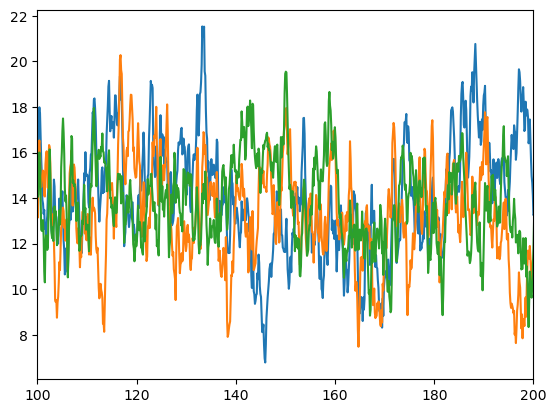

In [42]:
plt.plot(freqs / 1e6, stuff[:, 0] * (150e6/freqs)**3)
plt.plot(freqs / 1e6, stuff[:, 5] * (150e6/freqs)**3)
plt.plot(freqs / 1e6, stuff[:, 10] * (150e6/freqs)**3)
plt.xlim(100,200)

In [43]:
p = np.fft.fftshift(np.abs(np.fft.fft(stuff[:, 0]))**2)

In [44]:
k = np.fft.fftshift(np.fft.fftfreq(len(freqs), freqs[1] - freqs[0]))

divide by zero encountered in power


Text(0, 0.5, 'Power')

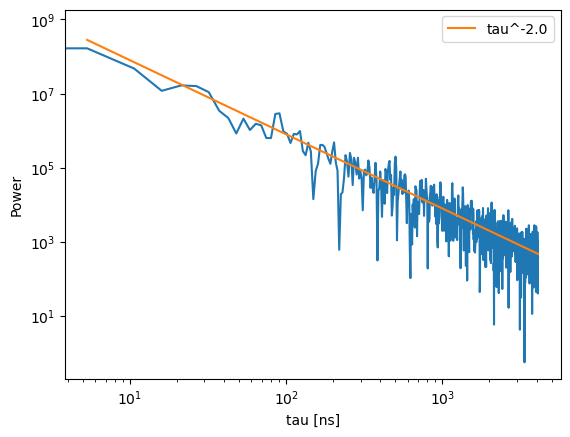

In [74]:
plt.loglog(k*1e9, p)
plt.loglog(k*1e9, 8e-9 * k**-2.0, label='tau^-2.0')
plt.legend()
plt.xlabel('tau [ns]')
plt.ylabel("Power")

In [4]:
sm.stokes

<Quantity [[[0.62363156, 0.70035363, 0.58237388, ..., 0.47430685,
             0.47884118, 0.64862725]],

           [[0.        , 0.        , 0.        , ..., 0.        ,
             0.        , 0.        ]],

           [[0.        , 0.        , 0.        , ..., 0.        ,
             0.        , 0.        ]],

           [[0.        , 0.        , 0.        , ..., 0.        ,
             0.        , 0.        ]]] Jy / sr>

In [5]:
sm.component_type

'healpix'

In [6]:
import healpy as hp

In [7]:
sm.stokes.shape

(4, 1, 196608)

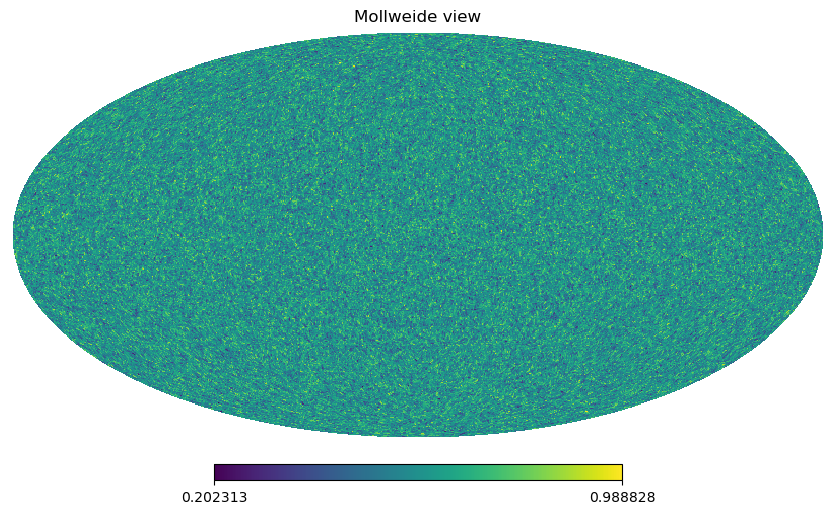

In [8]:
hp.mollview(sm.stokes[0,0])

In [10]:
power = hp.anafast(sm.stokes[0,0].value)

In [12]:
import matplotlib.pyplot as plt

In [59]:
ell = np.arange(1, len(power))

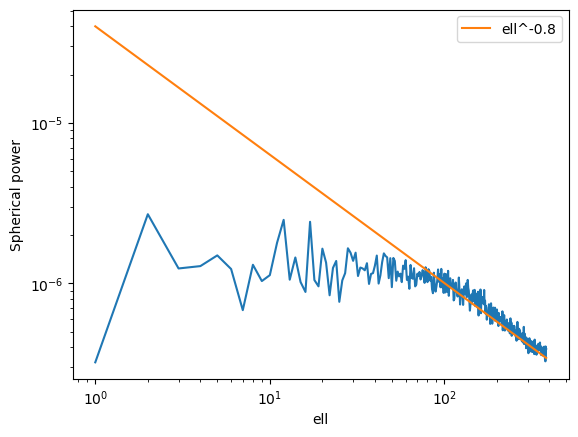

In [69]:
plt.loglog(ell, power[1:])
plt.loglog(ell, 4e-5 * ell**-0.8, label='ell^-0.8')

plt.xlabel("ell")
plt.ylabel("Spherical power")
plt.legend()

In [54]:
from vis_cpu.cpu import vis_cpu

In [55]:
from vis_cpu import simulate_vis

In [56]:
simulate_vis?

Signature:
simulate_vis(
    ants,
    fluxes,
    ra,
    dec,
    freqs,
    lsts,
    beams,
    polarized=False,
    precision=1,
    latitude=-0.5361913261514378,
    use_feed='x',
    use_gpu: 'bool' = False,
    beam_spline_opts: 'dict | None' = None,
    beam_idx: 'np.ndarray | None' = None,
    **backend_kwargs,
)
Docstring:
Run a basic simulation using ``vis_cpu``.

This wrapper handles the necessary coordinate conversions etc.

Parameters
----------
ants : dict
    Dictionary of antenna positions. The keys are the antenna names
    (integers) and the values are the Cartesian x,y,z positions of the
    antennas (in meters) relative to the array center.
fluxes : array_like
    2D array with the flux of each source as a function of frequency, of
    shape (NSRCS, NFREQS).
ra, dec : array_like
    Arrays of source RA and Dec positions in radians. RA goes from [0, 2 pi]
    and Dec from [-pi, +pi].
freqs : array_like
    Frequency channels for the simulation, in Hz.
lsts : array_